
Class distribution in Training set:
Class 0: 2832 samples
Class 1: 7354 samples

Class distribution in Test set:
Class 0: 1214 samples
Class 1: 3152 samples

✔️ Class distribution between Train and Test sets is similar.

Class distribution in Training set:
Class 0: 2832 samples
Class 1: 7354 samples

Class distribution in Test set:
Class 0: 1214 samples
Class 1: 3152 samples
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4946 - loss: 3.4247 - val_accuracy: 0.7219 - val_loss: 2.2113 - learning_rate: 5.0000e-04
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6794 - loss: 2.0345 - val_accuracy: 0.7219 - val_loss: 1.5977 - learning_rate: 5.0000e-04
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7014 - loss: 1.4524 - val_accuracy: 0.7387 - val_loss: 1.1574 - learning_rate: 5.0000e-04
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.7306 - loss: 1.1043 - val_accuracy: 0.7416 - val_loss: 0.9719 - learning_rate: 5.0000e-04
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7489 - loss: 0.8933 - val_accuracy: 0.7545 - val_loss: 0.7669 - learning_rate: 5.0000e-04
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7682 - loss: 0.7449 - val_accuracy: 0.7639 - val_loss: 0.7795 - learning_rate: 5.0000e-04
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 

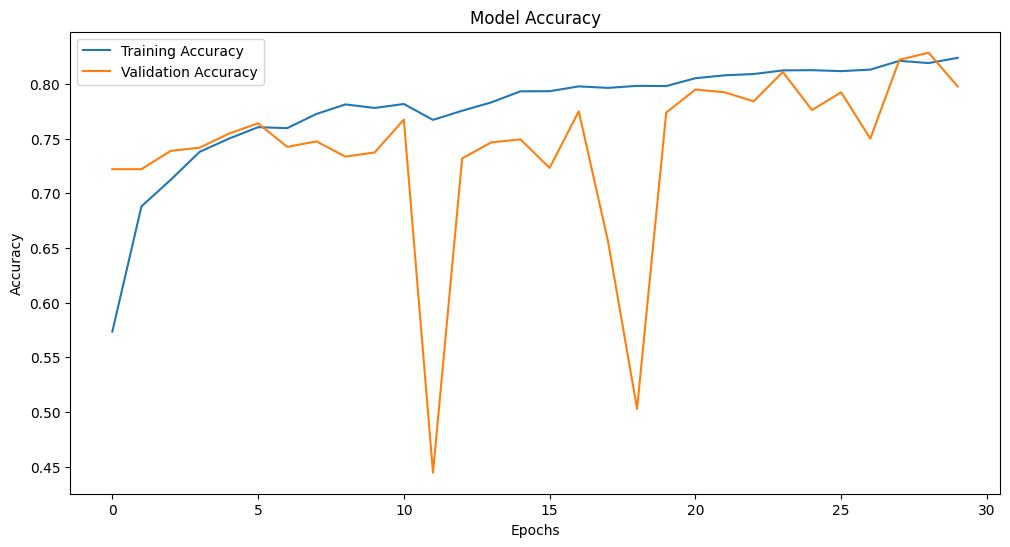

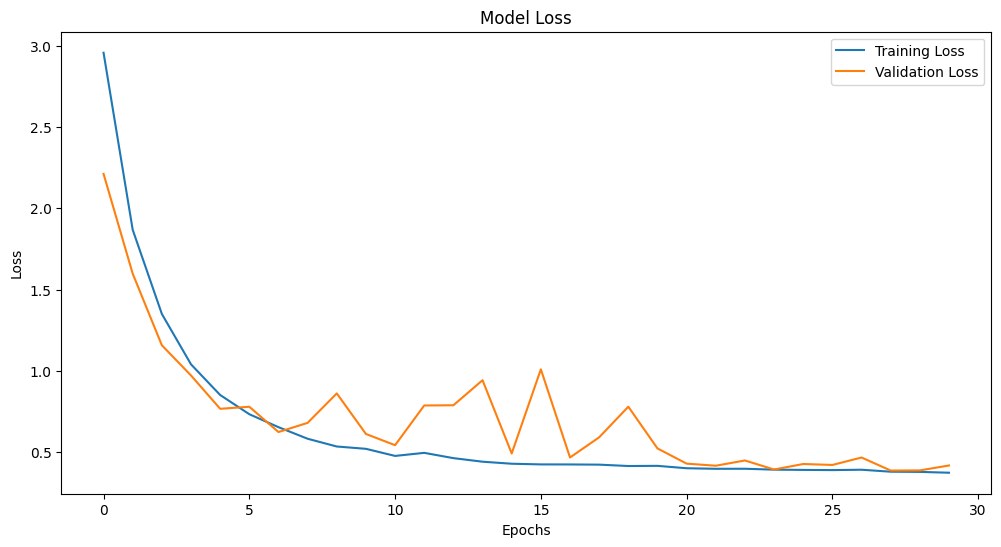

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# بررسی درست تقسیم شدن داده‌ها
def check_data_split(X_train, X_test, y_train, y_test):
    # 1. بررسی همپوشانی داده‌ها
    intersection = np.intersect1d(X_train.flatten(), X_test.flatten())
    if len(intersection) > 0:
        print("Warning: There is overlap between training and test sets!")
    else:
        print("✔️ No overlap between training and test sets.")

    # 2. بررسی تعادل کلاس‌ها در داده‌های آموزش
    train_classes, train_counts = np.unique(y_train, return_counts=True)
    print("\nClass distribution in Training set:")
    for cls, count in zip(train_classes, train_counts):
        print(f"Class {cls}: {count} samples")

    # 3. بررسی تعادل کلاس‌ها در داده‌های تست
    test_classes, test_counts = np.unique(y_test, return_counts=True)
    print("\nClass distribution in Test set:")
    for cls, count in zip(test_classes, test_counts):
        print(f"Class {cls}: {count} samples")

    # 4. بررسی مشابهت توزیع کلاس‌ها بین Train و Test
    train_distribution = train_counts / len(y_train)
    test_distribution = test_counts / len(y_test)
    if np.allclose(train_distribution, test_distribution, atol=0.05):  # تفاوت تا 5%
        print("\n✔️ Class distribution between Train and Test sets is similar.")
    else:
        print("\nWarning: Class distribution between Train and Test sets differs significantly!")
        print("Training distribution:", train_distribution)
        print("Test distribution:", test_distribution)

# 1. بارگذاری داده‌ها
normal_data = pd.read_csv('ptbdb_normal.csv', header=None)
abnormal_data = pd.read_csv('ptbdb_abnormal.csv', header=None)
# حذف ستون آخر از فایل normal_data
normal_data = normal_data.drop(columns=[normal_data.columns[-1]])

# حذف ستون آخر از فایل abnormal_data
abnormal_data = abnormal_data.drop(columns=[abnormal_data.columns[-1]])

# 2. افزودن برچسب‌ها
normal_data['label'] = 0  # برچسب 0 برای Normal
abnormal_data['label'] = 1  # برچسب 1 برای Abnormal

# 3. ترکیب داده‌ها
data = pd.concat([normal_data, abnormal_data], axis=0).reset_index(drop=True)

# 4. جدا کردن ویژگی‌ها و برچسب‌ها
X = data.iloc[:, :-1].values  # سیگنال‌های ECG
y = data['label'].values      # برچسب‌ها

# 5. تقسیم داده‌ها به مجموعه‌های آموزش و تست بر اساس زمان
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
check_data_split(X_train, X_test, y_train, y_test)

# 6. نرمال‌سازی داده‌ها
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. تغییر شکل داده‌ها برای LSTM (حفظ بعدهای زمانی)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 8. بررسی توزیع کلاس‌ها در داده‌های آموزش و تست
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

print("\nClass distribution in Training set:")
for cls, count in zip(train_classes, train_counts):
    print(f"Class {cls}: {count} samples")

print("\nClass distribution in Test set:")
for cls, count in zip(test_classes, test_counts):
    print(f"Class {cls}: {count} samples")
# 9. تعریف مدل RNN تقویت‌شده
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),  # افزایش Dropout

    tf.keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),  # Regularization

    tf.keras.layers.Dense(1, activation='sigmoid')  # طبقه‌بندی باینری
])

# 10. کامپایل و آموزش مدل
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # کاهش نرخ یادگیری
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,  # افزایش تعداد Epochها
    batch_size=64,  # افزایش Batch size
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),  # جلوگیری از overfitting
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)  # تنظیم نرخ یادگیری
    ]
)

# 11. ارزیابی مدل
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# 12. رسم نمودار تغییرات دقت و خطا
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()